<a href="https://colab.research.google.com/github/Seeeeiu/Python/blob/master/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1

# **Note: You will find importing data sets much easier if you have a google drive account.**

## Problem 5

In [1]:
from keras.datasets import mnist

(train_images, y_train), (test_images, y_test) = mnist.load_data()

nsamples, nx, ny = train_images.shape
X_train = train_images.reshape((nsamples,nx*ny))

nsamples, nx, ny = test_images.shape
X_test = test_images.reshape((nsamples,nx*ny))

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


###a. 

Using a training data set of 42000 observations, transform and fit the training data with 90% of the variance retained. Transform the remaining testing data (do not refit for the second transform)

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.90)

In [0]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

### b.

In [4]:
pca.explained_variance_ratio_.size

87

In [5]:
sum(pca.explained_variance_ratio_)

0.9001062226425085

### c.

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)

In [7]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

### d.

In [0]:
import matplotlib.pyplot as plt

(array([5923.,    0.,    0.,    0., 6742.,    0.,    0.,    0., 5958.,
           0.,    0.,    0., 6131.,    0.,    0.,    0., 5842.,    0.,
           0.,    0., 5421.,    0.,    0.,    0., 5918.,    0.,    0.,
           0., 6265.,    0.,    0.,    0., 5851.,    0.,    0., 5949.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
        2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25,
        5.5 , 5.75, 6.  , 6.25, 6.5 , 6.75, 7.  , 7.25, 7.5 , 7.75, 8.  ,
        8.25, 8.5 , 8.75, 9.  ]),
 <a list of 36 Patch objects>)

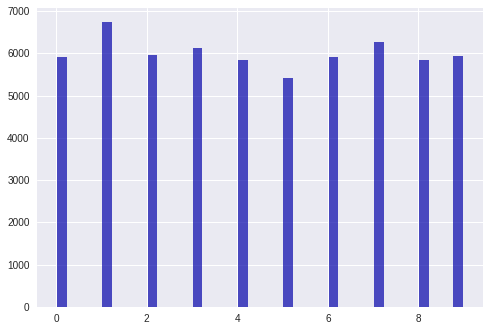

In [9]:
plt.hist(x=y_train, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)

## Problem 6

In [12]:
import pandas as pd
import numpy as np
import io

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [13]:
train6 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/lab1-train6.csv', sep=',', decimal='.')
test6 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/lab1-test6.csv', sep=',', decimal='.')

X_train = train6[['ListPrice','Age','Living','Lot']]
y_train = train6.iloc[:, 0]
X_test = test6.iloc[:, 1:5]

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 3)

FileNotFoundError: ignored

In [0]:
print(X_train.shape)
print(y_train.shape)

In [0]:
df = pd.DataFrame(data=y_pred)
df.to_csv('/content/gdrive/My Drive/Colab Notebooks/out6.csv')

My RMSE is:

## Problem 7

### a.

In [0]:
train7 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/lab1-train7.csv', sep=',', decimal='.')
test7 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/lab1-test7.csv', sep=',', decimal='.')

In [0]:
import statsmodels.api as sm
y_train =train7.values[:,-1] # take revenue column
x_train =train7.values[:,0:37] # 

x_train = sm.add_constant(x_train) 
result = sm.OLS(y_train, x_train).fit()

x_test = test7.valuesp[:,1:38]
x_test = sm.add_constant(x_test)

y_pred = result.predict(x_test)
                                   


In [0]:
df = pd.DataFrame(data=y_pred)
df.to_csv('/content/gdrive/My Drive/Colab Notebooks/out7.csv')

# RMSE :1945645

My RMSE is:

### b.